# Mnist DataScience (Training Stage)

## Develop training workflow

  1. develop component within the workflow (requirement.txt, script.py)
  3. define workflow (dependencies, parameters)

## Deploy training workflow
  
  1. choose deploying backend
  2. build/run workflow to train checker
  3. build/run workflow to train model
  
## Call Scanflow Server save the model

  1. scanflow server pull checker model (e.g., drift_detector)
  2. scanflow server pull model (e.g., mnist_cnn)
  
## Clean training environment
  
  1. clean training workflow, delete namespace
  
## Submit all model and artifacts to Scanflow Server
```bash
  mnist
    - workflow
       - load_data
         - loaddata.py
         - req_loaddata.txt
       - modeling_cnn
         - modeling.py
         - req_modeling.txt
       - checker
         - checker.py
         - req_checker.txt
    - meta
       - 
       - mnist-wf.json
       - mnist-checker-wf.json
       - Dockerfile-modeling
       - Dockerfile-checker
```

## Demo: Develop Training Workflows

In [1]:
import sys
import matplotlib.pyplot as plt
import os
sys.path.insert(0,'../..')

import scanflow

from scanflow.app import Executor, Relation, Workflow, Application
from scanflow.client import ScanflowClient

# App folder
base_path = os.path.dirname(os.getcwd())
app_dir = os.path.join(base_path, "examples/mnist-DS/workflow")
app_name = "mnist"


##workflow1 mnist-wf
## -- load_data
##       -- modeling_cnn
##       -- modeling_cnn1
executor1 = Executor(name='load_data', 
                      mainfile='loaddata.py',
                      parameters={'app_name': app_name,
                                  'team_name': 'data'},
                      requirements='req_loaddata.txt')

executor2 = Executor(name='modeling_cnn', 
                      mainfile='modeling.py',
                      parameters={'x_train_path': './data/mnist/train_images.npy', 
                                  'y_train_path': './data/mnist/train_labels.npy',
                                  'x_test_path': './data/mnist/test_images.npy',
                                  'y_test_path': './data/mnist/test_labels.npy'},
                      requirements='req_modeling.txt')

executor3 = Executor(name='modeling_cnn1', 
                      mainfile='modeling.py',
                      parameters={'x_train_path': './data/mnist/train_images.npy', 
                                  'y_train_path': './data/mnist/train_labels.npy',
                                  'x_test_path': './data/mnist/test_images.npy',
                                  'y_test_path': './data/mnist/test_labels.npy'},
                      requirements='req_modeling.txt')

executors1 = [executor1, executor2, executor3]

relation1 = Relation(depender='load_data',
                     dependee='modeling_cnn')

relation2 = Relation(depender='load_data',
                     dependee='modeling_cnn1')

relations1 = [relation1, relation2]

workflow1 = Workflow(name='mnist-wf', 
                     executors=executors1,
                     relations=relations1)

##workflow2 mnist-checker-wf
## -- load_data
##    -- checker
executor4 = Executor(name='checker', 
                      mainfile='modeling.py',
                      parameters={'x_train_path': './data/mnist/train_images.npy'},
                      requirements='req_modeling.txt')

executors2 = [executor1, executor4]

relation4 = Relation(depender='load_data',
                     dependee='checker')

relations2 = [relation4]

workflow2 = Workflow(name='mnist-checker-wf', 
                     executors=executors2,
                     relations=relations2)


workflows = [workflow1, workflow2]

app = Application(app_name, app_dir, 
              workflows=workflows,
              verbose=True)

In [4]:
import json
nested_dict = { 'dictA': {'key_1': 'value_1'},
                'dictB': {'key_2': 'value_2'}}
print(json.dumps(nested_dict, indent=2))

{
  "dictA": {
    "key_1": "value_1"
  },
  "dictB": {
    "key_2": "value_2"
  }
}


In [2]:
dic = app.to_dict()

20-Apr-21 11:05:30 -  INFO - Scanflowapp: {'app_name': 'mnist', 'app_dir': '/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/tutorials/examples/mnist-DS/workflow', 'workflows': [{'name': 'mnist-wf', 'executors': [{'name': 'load_data', 'mainfile': 'loaddata.py', 'parameters': {'app_name': 'mnist', 'team_name': 'data'}, 'requirements': 'req_loaddata.txt', 'dockerfile': None, 'env': None}, {'name': 'modeling_cnn', 'mainfile': 'modeling.py', 'parameters': {'x_train_path': './data/mnist/train_images.npy', 'y_train_path': './data/mnist/train_labels.npy', 'x_test_path': './data/mnist/test_images.npy', 'y_test_path': './data/mnist/test_labels.npy'}, 'requirements': 'req_modeling.txt', 'dockerfile': None, 'env': None}, {'name': 'modeling_cnn1', 'mainfile': 'modeling.py', 'parameters': {'x_train_path': './data/mnist/train_images.npy', 'y_train_path': './data/mnist/train_labels.npy', 'x_test_path': './data/mnist/test_images.npy', 'y_test_path': './data/mnist/test_labels.npy'}, 'requirements': 're

In [5]:
app.__dict__

{'app_name': 'mnist',
 'app_dir': '/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/tutorials/examples/mnist-DS/workflow',
 'workflows': [<scanflow.app.workflow.Workflow at 0x2af28f59c280>,
 'agents': None,
 'verbose': True}

In [3]:
import json
print(json.dumps(dic, indent=2))

{
  "app_name": "mnist",
  "app_dir": "/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/tutorials/examples/mnist-DS/workflow",
  "workflows": [
    {
      "name": "mnist-wf",
      "executors": [
        {
          "name": "load_data",
          "mainfile": "loaddata.py",
          "parameters": {
            "app_name": "mnist",
            "team_name": "data"
          },
          "requirements": "req_loaddata.txt",
          "dockerfile": null,
          "env": null
        },
        {
          "name": "modeling_cnn",
          "mainfile": "modeling.py",
          "parameters": {
            "x_train_path": "./data/mnist/train_images.npy",
            "y_train_path": "./data/mnist/train_labels.npy",
            "x_test_path": "./data/mnist/test_images.npy",
            "y_test_path": "./data/mnist/test_labels.npy"
          },
          "requirements": "req_modeling.txt",
          "dockerfile": null,
          "env": null
        },
        {
          "name": "modeling_cnn1",

In [15]:
app.workflows[0].__dict__

{'name': 'mnist-wf',
 'executors': [<scanflow.app.executor.Executor at 0x2b348aacfeb0>,
 'relations': [<scanflow.app.relation.Relation at 0x2b348a99b580>,
 '_to_dict': {'self': <scanflow.app.workflow.Workflow at 0x2b334ff29340>,
  'name': 'mnist-wf',
  'executors': [<scanflow.app.executor.Executor at 0x2b348aacfeb0>,
  'relations': [<scanflow.app.relation.Relation at 0x2b348a99b580>,
   <scanflow.app.relation.Relation at 0x2b348aacf100>]}}

In [16]:
app.workflows[0].executors[0].__dict__

{'name': 'load_data',
 'mainfile': 'loaddata.py',
 'parameters': {'app_name': 'mnist', 'team_name': 'data'},
 'requirements': 'req_loaddata.txt',
 'dockerfile': None,
 'env': None,
 '_to_dict': {'self': <scanflow.app.executor.Executor at 0x2b348aacfeb0>,
  'name': 'load_data',
  'mainfile': 'loaddata.py',
  'parameters': {'app_name': 'mnist', 'team_name': 'data'},
  'requirements': 'req_loaddata.txt',
  'dockerfile': None,
  'env': None,
  '__class__': scanflow.app.executor.Executor}}

In [12]:
import json
# with open("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/tutorials/mnist/workflow.json","w") as fd:
print(json.dumps(app, default=lambda obj: obj.__dict__()))

TypeError: 'dict' object is not callable

In [1]:
class Person(object):
    def __init__(self, first_name, last_name):
        self.first_name = first_name
        self.last_name = last_name

    @property
    def full_name(self):
        return self.first_name + ' ' + self.last_name

    @full_name.setter
    def full_name(self, value):
        first_name, last_name = value.split(' ')
        self.first_name = first_name
        self.last_name = last_name

    @full_name.deleter
    def full_name(self):
        del self.first_name
        del self.last_name

In [2]:
person = Person('Billy', 'Bob')

In [3]:
person.full_name

'Billy Bob'

In [20]:
person.first_name

'Billy'

In [21]:
person.first_name = 'peini'

In [22]:
person.first_name

'peini'

In [23]:
del person.first_name

In [24]:
person.first_name

AttributeError: 'Person' object has no attribute 'first_name'

In [12]:
setup


Setup = (
    Workflows: ['mnist']
)

In [15]:
setup.workflows_user

[{'name': 'mnist',
  'executors': [{'name': 'modeling-mnist',
    'file': 'modeling.py',
    'parameters': {'x_train_path': './data/mnist/train_images.npy',
     'y_train_path': './data/mnist/train_labels.npy',
     'x_test_path': './data/mnist/test_images.npy',
     'y_test_path': './data/mnist/test_labels.npy'},
    'requirements': 'req_modeling.txt'}],
  'tracker': <property at 0x2adbfc5a5c70>,
  'parallel': False}]

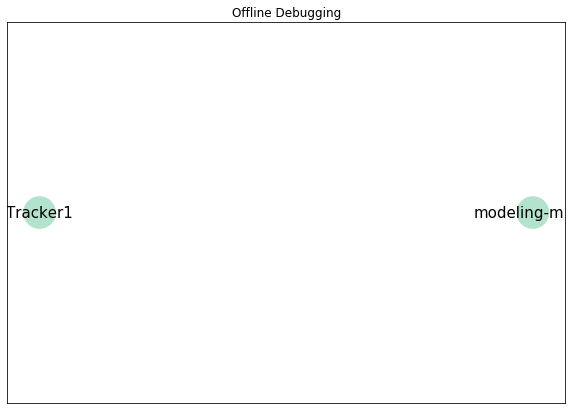

In [9]:
setup.draw_graph()

In [5]:
# scanflow client
client = ScanflowClient(server_uri="http://172.30.0.50:46666",
                        server_tracker_uri="http://172.30.0.50:46667",
                        verbose=True)

In [7]:
# deploy backend
argo = client.get_deploy_backend(setup, 
                  backend="argo", 
                  namespace="mnist-training",
                  registry="172.30.0.49:5000",
                  k8sconfigdir="/gpfs/bsc_home/xpliu/.kube/config")

15-Apr-21 19:32:00 -  INFO - [++]Creating namespace "mnist-training"
15-Apr-21 19:32:00 -  INFO - [++]Creating Role for 'default service account'


In [ ]:
argo.build_workflows()

## Submit All